In [331]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [332]:
train_data=pd.read_csv('train.csv')
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [333]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

C:\Users\Nandhu\AppData\Local\Temp\ipykernel_30512\2585098830.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['SalePrice'])


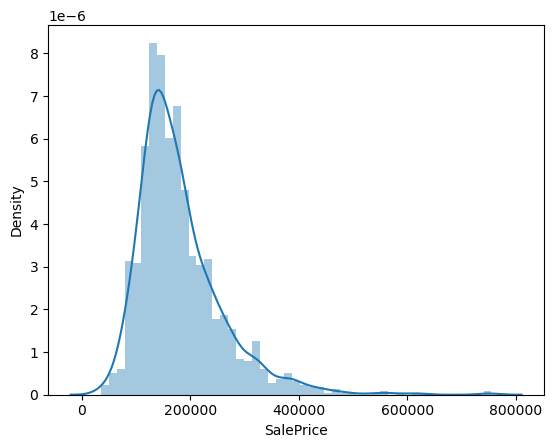

In [334]:
sns.distplot(train_data['SalePrice'])
plt.show()

In [335]:
train_data['SalePrice']=np.log(train_data['SalePrice'])


C:\Users\Nandhu\AppData\Local\Temp\ipykernel_30512\2998474799.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['SalePrice'],kde=True)


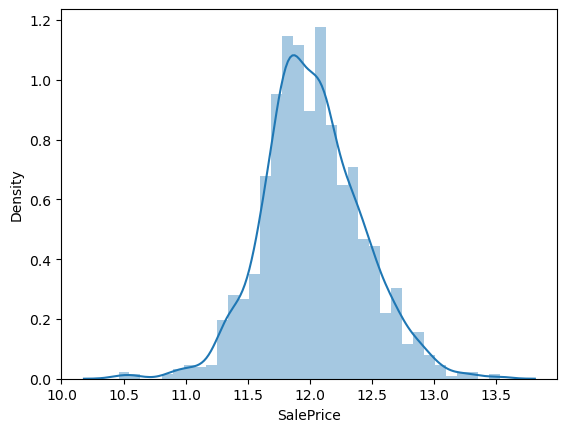

In [336]:
sns.distplot(train_data['SalePrice'],kde=True)
plt.show()

In [337]:
correlation=train_data.corr(numeric_only=True)   
top_features=correlation['SalePrice'].sort_values(ascending=False)
print(top_features)

SalePrice        1.000000
OverallQual      0.817184
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355878
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057329
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePr

In [338]:
test_data=pd.read_csv('test.csv')
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [339]:
# save ids & target for later use
train_id=train_data['Id']
test_id=test_data['Id']
y_train=train_data['SalePrice']

In [340]:
all_data = pd.concat((train_data.drop(['Id', 'SalePrice'], axis=1),
                      test_data.drop('Id', axis=1)), ignore_index=True)

In [341]:
all_data.shape

(2919, 79)

In [342]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [343]:
missing_values = all_data.isna().sum().sort_values(ascending=False)
missing_values

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
MasVnrType       1766
                 ... 
EnclosedPorch       0
MiscVal             0
MoSold              0
YrSold              0
SaleCondition       0
Length: 79, dtype: int64

In [344]:
missing_percentage  =   (missing_values / len(all_data)).sort_values(ascending=False) * 100
missing_percentage

PoolQC           99.657417
MiscFeature      96.402878
Alley            93.216855
Fence            80.438506
MasVnrType       60.500171
                   ...    
EnclosedPorch     0.000000
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
SaleCondition     0.000000
Length: 79, dtype: float64

In [345]:
misisng_info=pd.concat([missing_values,missing_percentage],axis=1,keys=['Total Missing', 'Percentage (%)'])
misisng_info[misisng_info['Total Missing']>0]

,Total Missing,Percentage (%)
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
MasVnrType,1766,60.500171
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageCond,159,5.447071
GarageFinish,159,5.447071
GarageYrBlt,159,5.447071


In [346]:
# How do u handle missing values?


all_data = all_data.drop(['Utilities'], axis=1)

# Columns where NaN means the feature is absent- like No Alley, No Pool- refer to data description
for col in ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','MasVnrType',
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    all_data[col] = all_data[col].fillna('None')

# Numeric columns where NaN means zero- which means no garage or basement
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 
            'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 
            'BsmtHalfBath', 'MasVnrArea']:
    all_data[col] = all_data[col].fillna(0)

# Impute LotFrontage based on the median of the neighborhood
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)

# Categorical features where NaN is likely a data entry error -> fill with mode
# MsZoning = NA means probably the data is missing, same goes with sale type & others.
# When data is truly missing like this and there are only a few instances, the safest strategy is to fill them with the most common value (the mode
for col in ['MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 
            'Exterior2nd', 'SaleType', 'Functional']:
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])


In [347]:

# Check if there are any missing values left
remaining_missing = all_data.isnull().sum().sum()
if remaining_missing == 0:
    print("\nSuccess! All missing values have been handled.")
else:
    print(f"\nWarning! There are still {remaining_missing} missing values.")


Success! All missing values have been handled.


In [348]:
# LOG TRANSFORM SKEWED NUMERIC FEATURES

from scipy.stats import skew

# Find all numeric features
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Calculate the skewness for each numeric feature
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())) 
skewed_feats = skewed_feats[skewed_feats > 0.75] # Filter for highly skewed features
skewed_feats = skewed_feats.index

print(f"\n{len(skewed_feats)} features are highly skewed: {skewed_feats}")



22 features are highly skewed: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')


In [349]:
# log transform skewed features
all_data[skewed_feats] = np.log1p(all_data[skewed_feats])


In [350]:
# CONVERTING NUMERICAL FEATURES TO CATEGORICAL

all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [351]:
# CREATING NEW MORE INFORMATIVE FEATURES

all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data['Total_Bathrooms'] = (all_data['FullBath'] + 0.5 * all_data['HalfBath']+
                               all_data['BsmtFullBath'] + 0.5 * all_data['BsmtHalfBath'])

In [352]:
all_data_before_dummies = all_data

In [353]:
# CONVERTING CATEGORICAL FEATURES TO NUMERICAL
# we need to convert our text based categorical cols like Neighborhood, MSZoning etc to numeric values 
# One hot encondig: Col: MSZoning which has vals RL, RM and creates new col for each unique value like MSZoning_RL, MSZoning_RM

# One-hot encoding
all_data = pd.get_dummies(all_data, drop_first=True)

In [354]:
all_data.shape #shape after one hot encoding

(2919, 294)

In [355]:
X = all_data[:len(train_data)]
X_test_final = all_data[len(train_data):]

In [356]:
y=y_train

In [357]:
X_train, X_test, y_train_split, y_test_split = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42 
)

In [358]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {X_test.shape}")

X_train shape: (1168, 294)
y_train shape: (292, 294)


In [359]:
model_performace={}

In [360]:
# LINEAR REGRESSION

from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train_split)



LinearRegression()

In [361]:

y_pred_lr = linear_regression.predict(X_test)
lr_rmse = root_mean_squared_error(y_test_split, y_pred_lr)
lr_r2 = r2_score(y_test_split, y_pred_lr)

In [362]:
model_performace['LinearRegression']={'RMSE': lr_rmse, 'R2': lr_r2}
print(f"Root Mean Squared Error (RMSE): {lr_rmse:.4f}")
print(f"R-squared (R²): {lr_r2:.4f}")

Root Mean Squared Error (RMSE): 0.1385
R-squared (R²): 0.8972


In [363]:
reg = linear_regression

print(f"Coefficients: {reg.coef_}")
print(f"Intercept: {reg.intercept_}")

Coefficients: [-1.11466678e-02  8.62779252e-02  3.41918895e-02  2.18233290e-03
  1.14673620e-03  9.74947788e-04  1.54528411e-02  6.09030722e-04
 -3.39690762e-03  8.39378030e-02 -5.34851501e-02 -1.56876199e-02
 -2.97359000e-03  4.36766330e-01  7.18201259e-03  3.52954358e-04
  3.56786242e-03  1.15586570e-02  4.01545084e-03 -1.35805819e-01
 -7.93057909e-03  2.27517471e-02 -1.29371738e-04  1.85852671e-02
  1.22805983e-04  3.60710331e-03  2.33593512e-03  1.66095566e-03
  7.70081696e-03  7.39973748e-03  4.01134513e+00 -2.05237622e-03
  1.47650331e-02  1.67056807e-02 -3.23108738e-02  8.91666443e-02
 -2.23920572e-01 -3.70134333e-02 -5.52345716e-02 -3.90997185e-03
 -4.17594558e-02 -2.35442929e-02 -6.09411444e-03 -4.34286701e-02
  2.07715768e-03  6.87783164e-13 -1.06783926e-01  3.03853631e-02
 -2.61065586e-02  3.80858490e-01  3.33054351e-01  3.22811551e-01
  3.01736057e-01  4.63311986e-02 -1.63428873e-02  1.65889193e-02
  1.89709605e-02  4.87905373e-02  1.05320516e-02  4.13990759e-02
 -1.0545083

In [364]:
# STOCHASTIC GRADIENT DESCENT

from sklearn.linear_model import SGDRegressor
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

numeric_features    =   X_train.select_dtypes(include=np.number).columns.tolist()
preprocessor_sgd=ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), numeric_features)
    ],
    remainder='passthrough' #keeping one hot encoding as they are
)



# SGD Pipeline
sgd_pipeline = Pipeline([
    ('preprocessor', preprocessor_sgd),
    ('sgd', SGDRegressor(
        max_iter=1000,
        tol=1e-3,
        penalty='l2',
        random_state=42,
        early_stopping=True
    ))
])


In [365]:
sgd_pipeline.fit(X_train, y_train_split)


c:\Users\Nandhu\anaconda3\envs\mlenv\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric', StandardScaler(),
                                                  ['LotFrontage', 'LotArea',
                                                   'OverallQual', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', '3SsnPorch',
                                                   'ScreenPorch', ...])])),
                ('sgd', SGDRegressor(early_stopping=True, random_state=42))])

In [366]:
y_pred_sgd= sgd_pipeline.predict(X_test)
sgd_rmse = root_mean_squared_error(y_test_split, y_pred_sgd)
sgd_r2 = r2_score(y_test_split, y_pred_sgd)
model_performace['SGDRegressor']={'RMSE': sgd_rmse, 'R2': sgd_r2}
print(f"Root Mean Squared Error (RMSE): {sgd_rmse:.4f}")
print(f"R-squared (R²): {sgd_r2:.4f}")


Root Mean Squared Error (RMSE): 0.2928
R-squared (R²): 0.5405


In [367]:
# DECISON TREE REGRESSOR

from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train_split)

DecisionTreeRegressor(random_state=42)

In [368]:
y_pred_dt = decision_tree.predict(X_test)
dt_rmse = root_mean_squared_error(y_test_split, y_pred_dt)
dt_r2 = r2_score(y_test_split, y_pred_dt)
model_performace['DecisionTreeRegressor']={'RMSE': dt_rmse, 'R2': dt_r2}
print(f"Root Mean Squared Error (RMSE): {dt_rmse:.4f}")
print(f"R-squared (R²): {dt_r2:.4f}")

Root Mean Squared Error (RMSE): 0.2330
R-squared (R²): 0.7092


In [369]:
# DECISION TREE REGRESSOR with PARAMETER TUNING

param_grid_dt = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

decision_tree = DecisionTreeRegressor(random_state=42)

grid_search_dt = GridSearchCV(decision_tree, param_grid_dt, cv=5, scoring='neg_root_mean_squared_error',verbose=1, n_jobs=-1)
grid_search_dt.fit(X_train, y_train_split)


Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 15, None],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [370]:

best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_
print(f"Best Parameters: {best_params_dt}")
print(f"Best Score: {best_score_dt:.4f}")

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best Score: -0.1893


In [371]:
y_pred_dt_tuned = grid_search_dt.predict(X_test)
dt_rmse_tuned = root_mean_squared_error(y_test_split, y_pred_dt_tuned)
dt_r2_tuned = r2_score(y_test_split, y_pred_dt_tuned)
model_performace['DecisionTreeRegressorTuned']={'RMSE': dt_rmse_tuned, 'R2': dt_r2_tuned}
print(f"Root Mean Squared Error (RMSE): {dt_rmse_tuned:.4f}")
print(f"R-squared (R²): {dt_r2_tuned:.4f}")

Root Mean Squared Error (RMSE): 0.1975
R-squared (R²): 0.7910


In [372]:
# BAGGING REGRESSOR
"""Trains the same model ( eg. DecisionTreeRegressor) multiple times and then averages the predictions.
The predictions are then used to train the next model.
"""

from sklearn.ensemble import BaggingRegressor

bagging_regressor = BaggingRegressor(
    estimator=DecisionTreeRegressor(random_state=42),
    n_estimators=50,
    random_state=42,
    n_jobs=-1,
    bootstrap=True,
    max_samples=1.0
)

bagging_regressor.fit(X_train, y_train_split)

BaggingRegressor(estimator=DecisionTreeRegressor(random_state=42),
                 n_estimators=50, n_jobs=-1, random_state=42)

In [373]:

y_pred_br = bagging_regressor.predict(X_test)
br_rmse = root_mean_squared_error(y_test_split, y_pred_br)
br_r2 = r2_score(y_test_split, y_pred_br)
model_performace['BaggingRegressor']={'RMSE': br_rmse, 'R2': br_r2}
print(f"Root Mean Squared Error (RMSE): {br_rmse:.4f}")
print(f"R-squared (R²): {br_r2:.4f}")

Root Mean Squared Error (RMSE): 0.1519
R-squared (R²): 0.8764


In [374]:
# PASTING REGRESSOR


pasting_regressor = BaggingRegressor(
    estimator=DecisionTreeRegressor(random_state=42),
    n_estimators=50,
    random_state=42,
    n_jobs=-1,
    bootstrap=False,
    max_samples=1.0
)

pasting_regressor.fit(X_train, y_train_split)

BaggingRegressor(bootstrap=False,
                 estimator=DecisionTreeRegressor(random_state=42),
                 n_estimators=50, n_jobs=-1, random_state=42)

In [375]:
y_pred_pr = pasting_regressor.predict(X_test)
pr_rmse = root_mean_squared_error(y_test_split, y_pred_pr)
pr_r2 = r2_score(y_test_split, y_pred_pr)
model_performace['PastingRegressor']={'RMSE': pr_rmse, 'R2': pr_r2}
print(f"Root Mean Squared Error (RMSE): {pr_rmse:.4f}")
print(f"R-squared (R²): {pr_r2:.4f}")

Root Mean Squared Error (RMSE): 0.2092
R-squared (R²): 0.7655


In [376]:
# SUPPORT VECTOR REGRESSOR without Tuning

from sklearn.svm import SVR
svr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_sgd), 
    ('regressor', SVR())
])

svr_pipeline.fit(X_train, y_train_split)

c:\Users\Nandhu\anaconda3\envs\mlenv\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric', StandardScaler(),
                                                  ['LotFrontage', 'LotArea',
                                                   'OverallQual', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageYrBlt', 'GarageCars',
                                                   'GarageArea', 'WoodDeckSF',
                                                   'OpenPorchSF',
                                                   'EnclosedPorch', '3SsnPorch',
                                                   'ScreenPorch', ...])])),
                ('regressor', SVR())])

In [377]:
y_pred_svr = svr_pipeline.predict(X_test)
svr_rmse = root_mean_squared_error(y_test_split, y_pred_svr)
svr_r2 = r2_score(y_test_split, y_pred_svr)
model_performace['SVR']={'RMSE': svr_rmse, 'R2': svr_r2}
print(f"Root Mean Squared Error (RMSE): {svr_rmse:.4f}")
print(f"R-squared (R²): {svr_r2:.4f}")

Root Mean Squared Error (RMSE): 0.1558
R-squared (R²): 0.8699


In [378]:
# SVR  WITH TUNING

from sklearn.model_selection import GridSearchCV

param_grid = {
    'regressor__C': [0.1, 1, 10],
    'regressor__kernel': ['linear', 'rbf'],
    'regressor__gamma': ['scale', 'auto']
}

svr_grid_search = GridSearchCV(svr_pipeline, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=1)
svr_grid_search.fit(X_train, y_train_split)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


c:\Users\Nandhu\anaconda3\envs\mlenv\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         StandardScaler(),
                                                                         ['LotFrontage',
                                                                          'LotArea',
                                                                          'OverallQual',
                                                                          'YearBuilt',
                                                                          'YearRemodAdd',
                                                                          'MasVnrArea',
                                                                          'BsmtFinSF1',
                                                                          'BsmtFinSF2',
                                                                          'BsmtUnfSF',
                                                                          'TotalBsmtSF',
                                                                          '1stFlrSF',
                                                                          '2ndFlrSF',
                                                                          'LowQualFinSF',
                                                                          'GrLivArea',
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBa...
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageYrBlt',
                                                                          'GarageCars',
                                                                          'GarageArea',
                                                                          'WoodDeckSF',
                                                                          'OpenPorchSF',
                                                                          'EnclosedPorch',
                                                                          '3SsnPorch',
                                                                          'ScreenPorch', ...])])),
                                       ('regressor', SVR())]),
             n_jobs=-1,
             param_grid={'regressor__C': [0.1, 1, 10],
                         'regressor__gamma': ['scale', 'auto'],
                         'regressor__kernel': ['linear', 'rbf']},
             scoring='neg_root_mean_squared_error', verbose=1)

In [379]:
y_pred_svr_grid = svr_grid_search.predict(X_test)
svr_grid_rmse = root_mean_squared_error(y_test_split, y_pred_svr_grid)
svr_grid_r2 = r2_score(y_test_split, y_pred_svr_grid)
model_performace['SVR with Tuning']={'RMSE': svr_grid_rmse, 'R2': svr_grid_r2}
print(f"Root Mean Squared Error (RMSE): {svr_grid_rmse:.4f}")
print(f"R-squared (R²): {svr_grid_r2:.4f}")

Root Mean Squared Error (RMSE): 0.1389
R-squared (R²): 0.8966


In [380]:
# MINI BATCH REGRESSOR

X_train_mb, X_test_mb, y_train_mb, y_test_mb = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
sgd_mini_batch = SGDRegressor(random_state=42)

In [381]:
n_epochs = 100
batch_size = 32
learning_rate = 0.01

for epoch in range(n_epochs):
    # Shuffle the data at the beginning of each epoch
    shuffled_indices = np.random.permutation(len(X_train_mb))
    X_train_shuffled = X_train_mb.iloc[shuffled_indices]
    y_train_shuffled = y_train_mb.iloc[shuffled_indices]

    for i in range(0, len(X_train_mb), batch_size):
        xi = X_train_shuffled[i:i+batch_size]
        yi = y_train_shuffled[i:i+batch_size]

        # Scale the batch
        xi_scaled = scaler.fit_transform(xi)

        # Update the model with a partial fit on the batch
        sgd_mini_batch.partial_fit(xi_scaled, yi)

In [382]:
X_test_mb_scaled = scaler.transform(X_test_mb)
y_pred_mb = sgd_mini_batch.predict(X_test_mb_scaled)
mb_rmse = root_mean_squared_error(y_test_mb, y_pred_mb)
mb_r2 = r2_score(y_test_mb, y_pred_mb)
model_performace['MiniBatchRegressor']={'RMSE': mb_rmse, 'R2': mb_r2}
print(f"Root Mean Squared Error (RMSE): {mb_rmse:.4f}")
print(f"R-squared (R²): {mb_r2:.4f}")

Root Mean Squared Error (RMSE): 0.2641
R-squared (R²): 0.6263


In [383]:
# GRADIENT BOOSTING REGRESSOR
'''
    Unlike a Random Forest which builds many trees independently, 
    a Gradient Boosting model builds trees one after another, 
    where each new tree works to correct the errors made by the previous one. 
    This sequential approach makes them incredibly powerful.
'''
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05,
                                      max_depth=4, random_state=42)
gbr_model.fit(X_train, y_train_split)

GradientBoostingRegressor(learning_rate=0.05, max_depth=4, n_estimators=300,
                          random_state=42)

In [384]:
y_pred_gbr = gbr_model.predict(X_test)
gbr_rmse = root_mean_squared_error(y_test_split, y_pred_gbr)
gbr_r2 = r2_score(y_test_split, y_pred_gbr)
model_performace['GradientBoostingRegressor']={'RMSE': gbr_rmse, 'R2': gbr_r2}
print(f"Root Mean Squared Error (RMSE): {gbr_rmse:.4f}")
print(f"R-squared (R²): {gbr_r2:.4f}")

Root Mean Squared Error (RMSE): 0.1366
R-squared (R²): 0.9000


In [385]:
# GBR WITH GRID SEARCH

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5]
}

gbr_grid_search = GridSearchCV(gbr_model, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=1)
gbr_grid_search.fit(X_train, y_train_split)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(learning_rate=0.05,
                                                 max_depth=4, n_estimators=300,
                                                 random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [386]:
best_gbr_model = gbr_grid_search.best_estimator_
best_params_gbr = gbr_grid_search.best_params_

In [387]:
y_pred_gbr_grid = best_gbr_model.predict(X_test)
gbr_grid_rmse = root_mean_squared_error(y_test_split, y_pred_gbr_grid)
gbr_grid_r2 = r2_score(y_test_split, y_pred_gbr_grid)
model_performace['GradientBoostingRegressor with Tuning']={'RMSE': gbr_grid_rmse, 'R2': gbr_grid_r2}
print(f"Root Mean Squared Error (RMSE): {gbr_grid_rmse:.4f}")
print(f"R-squared (R²): {gbr_grid_r2:.4f}")

Root Mean Squared Error (RMSE): 0.1393
R-squared (R²): 0.8960


In [388]:
# RANDOM FOREST REGRESSOR WITH GRID SEARCH
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
param_grid_rf = {
    'n_estimators': [200, 400, 600],
    'max_depth': [10, 15, 20],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 5]
}

# 2. Create and run GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf_model, 
    param_grid=param_grid_rf, 
    cv=3,  # Using 3 folds for speed
    scoring='neg_root_mean_squared_error', 
    n_jobs=-1, 
    verbose=1
)

grid_search_rf.fit(X_train, y_train_split)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [200, 400, 600]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [389]:
y_pred_rf_grid = grid_search_rf.predict(X_test)
rf_grid_rmse = root_mean_squared_error(y_test_split, y_pred_rf_grid)
rf_grid_r2 = r2_score(y_test_split, y_pred_rf_grid)
model_performace['RandomForestRegressor with Tuning']={'RMSE': rf_grid_rmse, 'R2': rf_grid_r2}
print(f"Root Mean Squared Error (RMSE): {rf_grid_rmse:.4f}")
print(f"R-squared (R²): {rf_grid_r2:.4f}")

Root Mean Squared Error (RMSE): 0.1487
R-squared (R²): 0.8815


In [390]:
# ENSEMBLE METHODS

# we will use our best 2 models here
estimators = [
    ('lr', linear_regression), 
    ('gbr', gbr_model)
] #score is 0.22402



In [391]:
from sklearn.ensemble import VotingRegressor
voting_regressor = VotingRegressor(estimators=estimators)
voting_regressor.fit(X_train, y_train_split)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('gbr',
                             GradientBoostingRegressor(learning_rate=0.05,
                                                       max_depth=4,
                                                       n_estimators=300,
                                                       random_state=42))])

In [392]:
y_pred_voting = voting_regressor.predict(X_test)
voting_rmse = root_mean_squared_error(y_test_split, y_pred_voting)
voting_r2 = r2_score(y_test_split, y_pred_voting)
model_performace['VotingRegressor']={'RMSE': voting_rmse, 'R2': voting_r2}
print(f"Root Mean Squared Error (RMSE): {voting_rmse:.4f}")
print(f"R-squared (R²): {voting_r2:.4f}")

Root Mean Squared Error (RMSE): 0.1264
R-squared (R²): 0.9144


In [393]:
# XGBoost
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=4,
                         random_state=42)
xgb_model.fit(X_train, y_train_split)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [394]:
y_pred_xgb = xgb_model.predict(X_test)
xgb_rmse = root_mean_squared_error(y_test_split, y_pred_xgb)
xgb_r2 = r2_score(y_test_split, y_pred_xgb)
model_performace['XGBRegressor']={'RMSE': xgb_rmse, 'R2': xgb_r2}
print(f"Root Mean Squared Error (RMSE): {xgb_rmse:.4f}")
print(f"R-squared (R²): {xgb_r2:.4f}")

Root Mean Squared Error (RMSE): 0.1364
R-squared (R²): 0.9003


In [395]:
# XGBOOST with PARAMETER TUNING

param_grid_xgb = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.7, 1.0]
}

xgb_model = XGBRegressor(random_state=42)

grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='neg_root_mean_squared_error',verbose=1,n_jobs=-1)
grid_search_xgb.fit(X_train, y_train_split)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 1.0],
                         'learning_rate': [0.05, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 300, 500]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [396]:

best_params_xgb = grid_search_xgb.best_params_
best_xgb_model = grid_search_xgb.best_estimator_


In [397]:
y_pred_xgb_tuned = best_xgb_model.predict(X_test)
xgb_rmse_tuned = root_mean_squared_error(y_test_split, y_pred_xgb_tuned)
xgb_r2_tuned = r2_score(y_test_split, y_pred_xgb_tuned)
model_performace['XGBRegressorTuned']={'RMSE': xgb_rmse_tuned, 'R2': xgb_r2_tuned}
print(f"Root Mean Squared Error (RMSE): {xgb_rmse_tuned:.4f}")
print(f"R-squared (R²): {xgb_r2_tuned:.4f}")

Root Mean Squared Error (RMSE): 0.1309
R-squared (R²): 0.9082


In [398]:
# LIGHTGBM

from lightgbm import LGBMRegressor
lgbm_model = LGBMRegressor(random_state=42)
lgbm_model.fit(X_train, y_train_split)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3458
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 197
[LightGBM] [Info] Start training from score 12.030652


LGBMRegressor(random_state=42)

In [399]:
y_pred_lgbm = lgbm_model.predict(X_test)
lgbm_rmse = root_mean_squared_error(y_test_split, y_pred_lgbm)
lgbm_r2 = r2_score(y_test_split, y_pred_lgbm)
model_performace['LGBMRegressor']={'RMSE': lgbm_rmse, 'R2': lgbm_r2}
print(f"Root Mean Squared Error (RMSE): {lgbm_rmse:.4f}")
print(f"R-squared (R²): {lgbm_r2:.4f}")

Root Mean Squared Error (RMSE): 0.1465
R-squared (R²): 0.8850


In [400]:
# LIGHTGBM with PARAMETER TUNING

param_grid_lgbm = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.7, 1.0]
}
grid_search_lgbm = GridSearchCV(
    estimator=lgbm_model,
    param_grid=param_grid_lgbm,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search_lgbm.fit(X_train, y_train_split)
best_params_lgbm = grid_search_lgbm.best_params_
best_lgbm_model = grid_search_lgbm.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000758 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3458
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 197
[LightGBM] [Info] Start training from score 12.030652
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [401]:
y_pred_lgbm_tuned = best_lgbm_model.predict(X_test)
lgbm_rmse_tuned = root_mean_squared_error(y_test_split, y_pred_lgbm_tuned)
lgbm_r2_tuned = r2_score(y_test_split, y_pred_lgbm_tuned)
model_performace['LGBMRegressorTuned']={'RMSE': lgbm_rmse_tuned, 'R2': lgbm_r2_tuned}
print(f"Root Mean Squared Error (RMSE): {lgbm_rmse_tuned:.4f}")
print(f"R-squared (R²): {lgbm_r2_tuned:.4f}")

Root Mean Squared Error (RMSE): 0.1363
R-squared (R²): 0.9005


In [402]:
# CAT BOOST

from catboost import CatBoostRegressor

# CatBoost works best with the original categorical features, not one-hot encoded ones.
# We will use the 'all_data' DataFrame from before we ran pd.get_dummies()
X_cat = all_data_final = all_data.copy()
y_cat = y # y is already our log-transformed SalePrice

categorical_features_for_catboost = X_cat.select_dtypes(include=['object']).columns.tolist()
X_cat_for_training = X_cat[:len(train_data)]
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(
    X_cat_for_training, y_cat, test_size=0.2, random_state=42
)
cat_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    cat_features=categorical_features_for_catboost, # Tell the model which columns are categorical
    verbose=0, 
    random_state=42
)
cat_model.fit(X_train_cat, y_train_cat)

In [403]:
y_pred_cat = cat_model.predict(X_test_cat)
cat_rmse = root_mean_squared_error(y_test_cat, y_pred_cat)
cat_r2 = r2_score(y_test_cat, y_pred_cat)
model_performace['CatBoostRegressor']={'RMSE': cat_rmse, 'R2': cat_r2}
print(f"Root Mean Squared Error (RMSE): {cat_rmse:.4f}")
print(f"R-squared (R²): {cat_r2:.4f}")

Root Mean Squared Error (RMSE): 0.1311
R-squared (R²): 0.9079


In [404]:
# CAT BOOST with PARAMETER TUNING

param_grid_cat = {
    'iterations': [500, 1000],
    'learning_rate': [0.05, 0.1],
    'depth': [6, 8]
}
grid_search_cat = GridSearchCV(
    estimator=cat_model,
    param_grid=param_grid_cat,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search_cat.fit(X_train_cat, y_train_cat)
best_params_cat = grid_search_cat.best_params_
best_cat_model = grid_search_cat.best_estimator_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [405]:
y_pred_cat_tuned = best_cat_model.predict(X_test_cat)
cat_rmse_tuned = root_mean_squared_error(y_test_cat, y_pred_cat_tuned)
cat_r2_tuned = r2_score(y_test_cat, y_pred_cat_tuned)
model_performace['CatBoostRegressorTuned']={'RMSE': cat_rmse_tuned, 'R2': cat_r2_tuned}
print(f"Root Mean Squared Error (RMSE): {cat_rmse_tuned:.4f}")
print(f"R-squared (R²): {cat_r2_tuned:.4f}")

Root Mean Squared Error (RMSE): 0.1311
R-squared (R²): 0.9079


In [406]:
# Voting Regressor with 4 models
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('lr', LinearRegression())
])


xgb_model = grid_search_xgb.best_estimator_
svr_pipeline = svr_grid_search.best_estimator_ 

# --- 2. Create the All-Star Ensemble ---
# Using the exact list of estimators you suggested
all_star_estimators = [
    ('lr', lr_pipeline),
    ('gbr', gbr_model),
    ('xgb', xgb_model),
    ('svr', svr_pipeline)
]

voting_regressor_4 = VotingRegressor(estimators=all_star_estimators)
voting_regressor_4.fit(X_train, y_train_split)

VotingRegressor(estimators=[('lr',
                             Pipeline(steps=[('scaler', StandardScaler()),
                                             ('lr', LinearRegression())])),
                            ('gbr',
                             GradientBoostingRegressor(learning_rate=0.05,
                                                       max_depth=4,
                                                       n_estimators=300,
                                                       random_state=42)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.7, device=None,
                                          ea...
                                                                                'BsmtFinSF2',
                                                                                'BsmtUnfSF',
                                                                                'TotalBsmtSF',
                                                                                '1stFlrSF',
                                                                                '2ndFlrSF',
                                                                                'LowQualFinSF',
                                                                                'GrLivArea',
                                                                                'BsmtFullBath',
                                                                                'BsmtHalfBath',
                                                                                'FullBath',
                                                                                'HalfBath',
                                                                                'BedroomAbvGr',
                                                                                'KitchenAbvGr',
                                                                                'TotRmsAbvGrd',
                                                                                'Fireplaces',
                                                                                'GarageYrBlt',
                                                                                'GarageCars',
                                                                                'GarageArea',
                                                                                'WoodDeckSF',
                                                                                'OpenPorchSF',
                                                                                'EnclosedPorch',
                                                                                '3SsnPorch',
                                                                                'ScreenPorch', ...])])),
                                             ('regressor',
                                              SVR(C=1, gamma='auto'))]))])

In [407]:
y_pred_voting_4 = voting_regressor_4.predict(X_test)
voting_rmse_4 = root_mean_squared_error(y_test_split, y_pred_voting_4)
voting_r2_4 = r2_score(y_test_split, y_pred_voting_4)
model_performace['VotingRegressor4']={'RMSE': voting_rmse_4, 'R2': voting_r2_4}
print(f"Root Mean Squared Error (RMSE): {voting_rmse_4:.4f}")
print(f"R-squared (R²): {voting_r2_4:.4f}")

Root Mean Squared Error (RMSE): 0.1255
R-squared (R²): 0.9155


In [408]:
# Voting Regressor with 3 models   
top_3_estimators = [
    
    ('xgb', xgb_model),
    ('cat', best_cat_model),
    ('lgbm', best_lgbm_model),
    

]

voting_regressor_3 = VotingRegressor(estimators=top_3_estimators,weights=[0.4, 0.3, 0.3],n_jobs=-1)
voting_regressor_3.fit(X_train, y_train_split)

VotingRegressor(estimators=[('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.7, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=500,
                                          n_jobs=None, num_parallel_tree=None, ...)),
                            ('cat',
                             <catboost.core.CatBoostRegressor object at 0x0000020D3AF88320>),
                            ('lgbm',
                             LGBMRegressor(colsample_bytree=0.7,
                                           learning_rate=0.05, max_depth=3,
                                           n_estimators=500,
                                           random_state=42))],
                n_jobs=-1, weights=[0.4, 0.3, 0.3])

In [409]:
y_pred_voting_3 = voting_regressor_3.predict(X_test)
voting_rmse_3 = root_mean_squared_error(y_test_split, y_pred_voting_3)
voting_r2_3 = r2_score(y_test_split, y_pred_voting_3)
model_performace['VotingRegressor3']={'RMSE': voting_rmse_3, 'R2': voting_r2_3}
print(f"Root Mean Squared Error (RMSE): {voting_rmse_3:.4f}")
print(f"R-squared (R²): {voting_r2_3:.4f}")

Root Mean Squared Error (RMSE): 0.1306
R-squared (R²): 0.9086


In [410]:
# Our best models
performance_df = pd.DataFrame.from_dict(model_performace, orient='index', columns=['RMSE','R2'])
print(performance_df.sort_values(by='RMSE'))

                                           RMSE        R2
VotingRegressor4                       0.125546  0.915538
VotingRegressor                        0.126424  0.914352
VotingRegressor3                       0.130580  0.908628
XGBRegressorTuned                      0.130896  0.908186
CatBoostRegressor                      0.131131  0.907855
CatBoostRegressorTuned                 0.131131  0.907855
LGBMRegressorTuned                     0.136270  0.900492
XGBRegressor                           0.136405  0.900295
GradientBoostingRegressor              0.136625  0.899973
LinearRegression                       0.138482  0.897235
SVR with Tuning                        0.138924  0.896578
GradientBoostingRegressor with Tuning  0.139298  0.896021
LGBMRegressor                          0.146495  0.884999
RandomForestRegressor with Tuning      0.148706  0.881502
BaggingRegressor                       0.151856  0.876428
SVR                                    0.155795  0.869935
DecisionTreeRe

In [411]:
# RE-EVALUATE TOP MODELS WITH CROSS VALIDATION
# we will use our best 2 models here- lr, gbr & voting regressor

from sklearn.model_selection import cross_val_score, KFold

#shuffle the data
kf = KFold(n_splits=5, shuffle=True, random_state=42)

models_to_test = {
    "Linear Regression": linear_regression,
    "Gradient Boosting": gbr_model,
    "Voting Ensemble": voting_regressor
}

cv_results = {}

for model_name, model in models_to_test.items():
    scores = cross_val_score(model, X, y, cv=kf, scoring='neg_root_mean_squared_error')
    rmse_scores = -scores
    cv_results[model_name] = rmse_scores

    print(f"Model: {model_name}")
    print(f"Mean RMSE: {rmse_scores.mean():.4f}")
    print(f"Standard Deviation: {rmse_scores.std():.4f}")
    print()

    

Model: Linear Regression
Mean RMSE: 0.1447
Standard Deviation: 0.0144

Model: Gradient Boosting
Mean RMSE: 0.1339
Standard Deviation: 0.0211

Model: Voting Ensemble
Mean RMSE: 0.1274
Standard Deviation: 0.0187



In [412]:
best_model_name = min(cv_results, key=lambda k: cv_results[k].mean())
print(f"The best and most robust model is: {best_model_name}")
print(f"With a mean cross-validated RMSE of: {cv_results[best_model_name].mean():.4f}")

The best and most robust model is: Voting Ensemble
With a mean cross-validated RMSE of: 0.1274


In [ ]:
# CHAMPION MODEL ON FULL DATASET

champion_model = voting_regressor_4
champion_model.fit(X, y)

In [ ]:
y_pred_champion = champion_model.predict(X_test_final)
final_prediction = np.expm1(y_pred_champion)

In [ ]:
submission_df = pd.DataFrame({'Id': test_data.Id, 'SalePrice': final_prediction})
submission_df.to_csv('submission.csv', index=False)

In [430]:
Print(Stop Running here!)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2584213332.py, line 1)

The Following is for practising model deployment using Flask. Checkout HousePriceApi for app.py & test-api.py. The code for kaggle competition is done here. Do no Proceed further

In [427]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

categorical_features = all_data_before_dummies.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_features = all_data_before_dummies.select_dtypes(include=np.number).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # Catches missing Fare, etc.
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor_final_corrected = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
lr=LinearRegression()
svr=svr_grid_search.best_estimator_.named_steps['regressor']
champion_estimators = [
    ('lr', lr),
    ('gbr', best_gbr_model),
    ('xgb', xgb_model),
    ('svr', svr)
]

voting_regressor_final = VotingRegressor(estimators=champion_estimators, n_jobs=-1)
champion_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_final_corrected),
    ('regressor', voting_regressor_final)
])
# champion_model_pipeline.fit(X, y) 
X_final_train = all_data_before_dummies[:len(train_data)]
y_log_train = np.log1p(y_train) # Use the original y_train (SalePrice) and log-transform it

champion_model_pipeline.fit(X_final_train, y_log_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['LotFrontage', 'LotArea',
                                                   'OverallQual', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFul...
                                                           importance_type=None,
                                                           interaction_constraints=None,
                                                           learning_rate=0.05,
                                                           max_bin=None,
                                                           max_cat_threshold=None,
                                                           max_cat_to_onehot=None,
                                                           max_delta_step=None,
                                                           max_depth=3,
                                                           max_leaves=None,
                                                           min_child_weight=None,
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           multi_strategy=None,
                                                           n_estimators=500,
                                                           n_jobs=None,
                                                           num_parallel_tree=None, ...)),
                                             ('svr', SVR(C=1, gamma='auto'))],
                                 n_jobs=-1))])

In [428]:
# SAVE MODEL
import joblib
# model_colums = X.columns #save cols in order to use api
# joblib.dump(model_colums, 'model_columns.joblib')

# save the entire model
joblib.dump(champion_model_pipeline, 'hp_model.joblib')

['hp_model.joblib']

In [429]:

joblib.dump(list(X_final_train.columns), 'final_model_columns.joblib')

['final_model_columns.joblib']